<a href="https://colab.research.google.com/github/jahnavi-maddhuri/JahnaviMaddhuri-DukeXAI/blob/main/ExplainableTechniquesII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explainable Techniques II

Jahnavi Maddhuri

I completed this homework assignment with the assistance of ChatGPT 5.0. I would ask questions about concepts and plots we are exploring in this assignment, prompting for understanding of more specific differences between the plots as well. ChatGPT link: https://chatgpt.com/c/68d9be99-bbd0-8327-bf07-6fe47ba583a3. From here forward, I will cite this link as [AI].

In [23]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-fnsmenxx/alepython_fe369e6ed0a2404b8f0153f6e0be48b0
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-fnsmenxx/alepython_fe369e6ed0a2404b8f0153f6e0be48b0
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.2 MB/s eta 0:00:00
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350ab6-py3-none-any.whl size=15251 sha256=8119c04972d31618d41c0aa536f2918b3155ae2c1f6eb24691d9d983f2837b65
  Stored in directory: /tmp/pip-ephem-wheel-cache-upb2i1oq/wheels/87/54/8b/9357059e0e9ade0ea889a30fe56beaed44312e07475133b2cc
Successfully built alepython


In [26]:
# necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

from alepython import ale_plot

import matplotlib.pyplot as plt
import seaborn as sns

## Dataset and Model Selection
I choose the diabetes dataset that is available through the sklearn package. In this dataset I choose five features as the explanatory variables to predict the response variable, disease progression after one year. In these five features, I expect s1, s2 and s3 to be correlated since these are blood serum measurements. I choose correlated features with the expectation of eventually exploring larger differences between PDP and ALE plots.

### EDA
For the EDA portion, prior to fitting the model, I produce descriptive statistics, missing rate by column and a correlation heatmap to better understand how correlation amongst feature columns.

In [15]:
# data
data = load_diabetes(as_frame=True)
X = data.data[["bmi", "bp", "s1", "s2", "s3"]]
y = data.target


In [12]:
# Descriptive Stats
X.join(y).describe()

,bmi,bp,s1,s2,s3,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,25.000000
25%,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,87.000000
50%,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,140.500000
75%,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,211.500000
max,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,346.000000


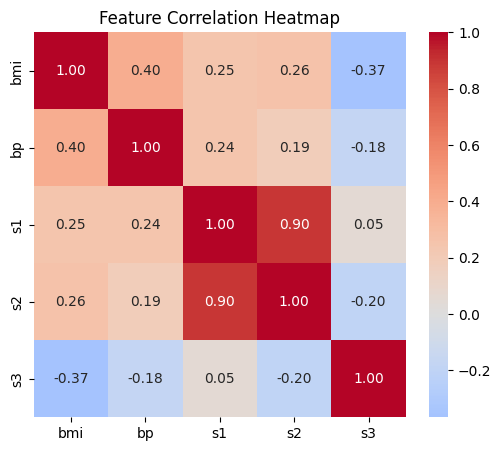

In [8]:
# correlation plot
corr = X.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
# Missing Values
X.join(y).isna().sum()

,0
bmi,0
bp,0
s1,0
s2,0
s3,0
target,0


During EDA, I discovered that s1 and s2 (different measures related to blood serum) are highly correlated with a coefficient of 0.9. Given this correlation, I expect the Partial Dependence Plots to differ from the ALE plots.

## Fit Random Forests Model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# random forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

print("R^2 on test:", rf.score(X_test, y_test))

R^2 on test: 0.21201313058740934


## ICE, PDP and ALE plots by feature

### Feature: bmi

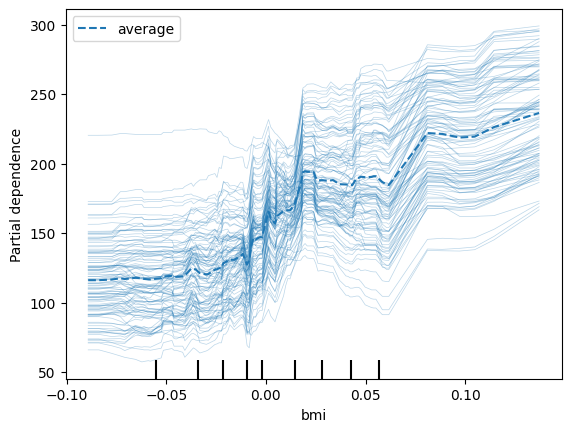

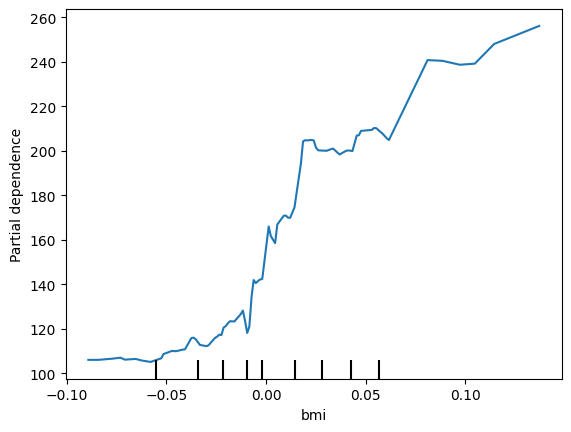

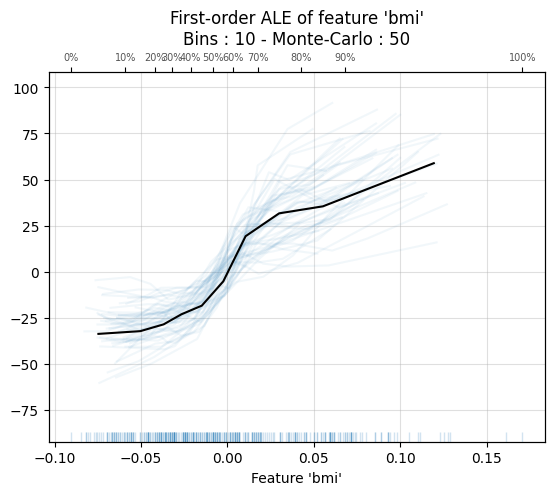

In [36]:
feature = ["bmi"]

PartialDependenceDisplay.from_estimator(rf, X_test, feature, kind='both')
PartialDependenceDisplay.from_estimator(rf, X_test, feature, kind='average')
ale_plot(rf, X_train, feature, monte_carlo=True)

plt.show()

In general, all three plots support the notion that there is a positive correlation between bmi and predicted disease progression. Note that in this dataset, all features are standardized so when considering the scale of bmi, 0 would be an average bmi and +/- 0.05 would be approximately 1 standard deviation above or below the mean. This interpretation of the scale of the coefficient holds true for the remaining features as well.

The ICE plot highlights **meaningful interaction effects** between bmi and other variables like bp ore serum levels. Specifically, around mean bmi of the dataset, 0, there is a lot of crossing, emphasizing the potential interaction impact from other variables. These interactions are most probably due to the morderate correlation with BP at a 0.4 level.

The PDP plot takes the average line in the first ICE plot and plots it alone. Cumulatively, there is a strong postive relationship between bmi and diabetes progression, especially in BMIs that are larger than the mean.

Finally, the ALE plot supports a similar story, with the model being most sensitive to BMI changes around the mean, and specifically above.

### Feature: **bp**

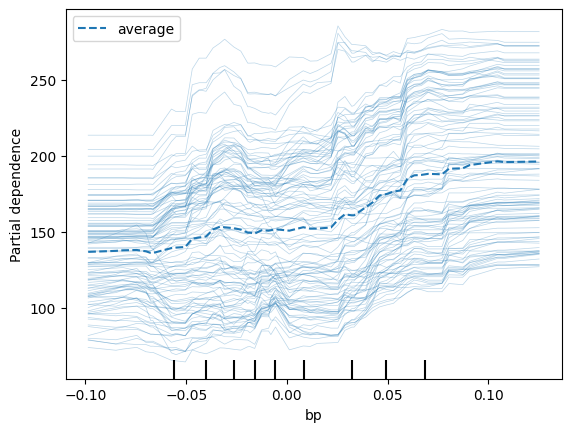

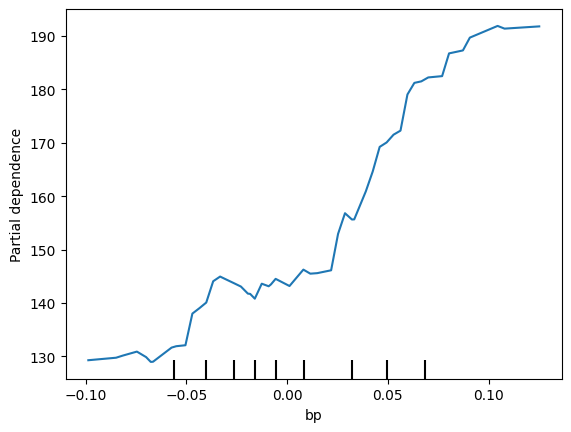

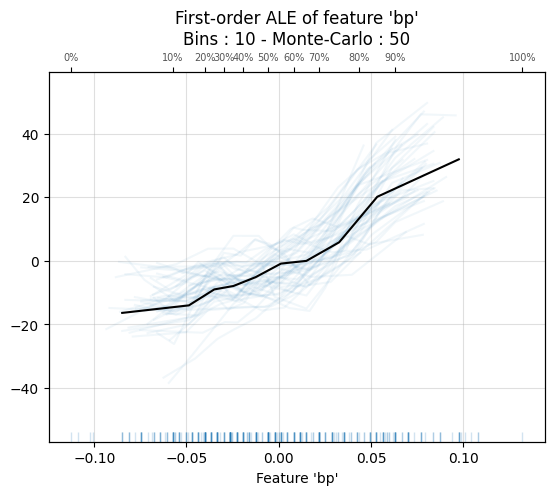

In [38]:
feature = ["bp"]

PartialDependenceDisplay.from_estimator(rf, X_test, feature, kind='both')
PartialDependenceDisplay.from_estimator(rf, X_test, feature, kind='average')
ale_plot(rf, X_train, feature, monte_carlo=True)

plt.show()

When considering BP, the three plots support the narrative that the higher the BP the worse the predicted progression would be. In the ICE plots, the most sensitive BP range (standardized) is between .02 and .06. During this window, we see the most interactions with many crossings and indication that other factors may be at play here. PDP supports this trend with an overall positive trend while ALE displays the smooth shape. The steepest slope in this graph is right above the mean BP, and tapers as BP is very high or low compared to the average.

### Feature: s1

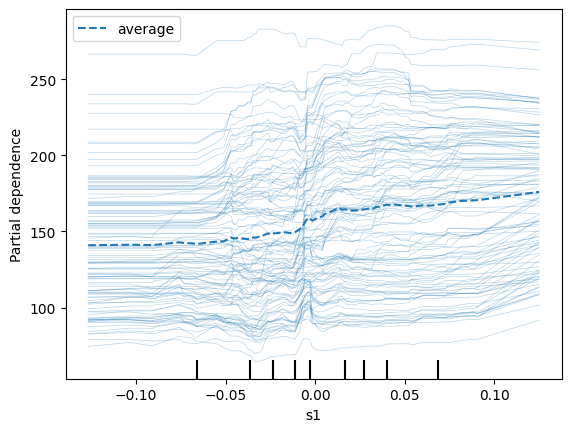

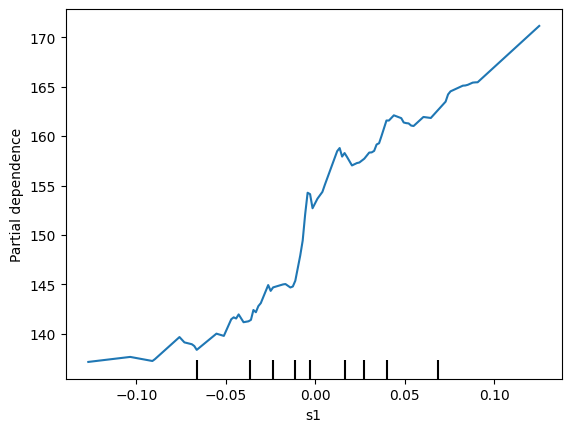

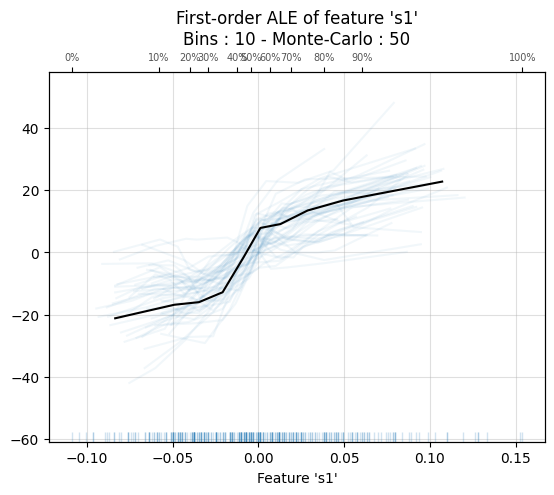

In [39]:
feature = ["s1"]

PartialDependenceDisplay.from_estimator(rf, X_test, feature, kind='both')
PartialDependenceDisplay.from_estimator(rf, X_test, feature, kind='average')
ale_plot(rf, X_train, feature, monte_carlo=True)

plt.show()

Once again, even for s1 levels, the three plots all show that as s1 levels are larger, the predicted progression of diabetes is higher. In the ICE plot, the largest crossings and jump occur around the mean when the standardized s1 is just below 0. This points to interaction and most probably due to the high correlation with s2. In the PDP, there is a monotonic increase with the largest increase around mean s1 levels. after the standardized s1 level surpasses 0.05, this trend becomes much less steep. The ALE highlights the overall trend from a localized analysis. Here, when average standardized s1 is less between -0.02 and 0.03 we see the largest relative effect.